In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [12]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [15]:
X_train.shape

(60000, 28, 28)

In [17]:
X_test.shape

(10000, 28, 28)

In [18]:
X_train[0].shape

(28, 28)

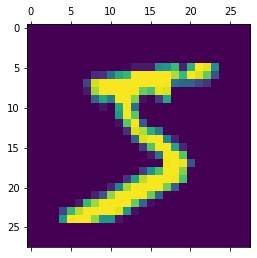

In [19]:
plt.matshow(X_train[0])

In [20]:
y_train[0]

5

In [21]:
X_train = X_train / 255
X_test = X_test / 255

**we must normalize our data as it is always required in neural network models. We can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code).**

**ANN for Classification**

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4539 - accuracy: 0.8704
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1345 - accuracy: 0.9597
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0896 - accuracy: 0.9733
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0672 - accuracy: 0.9793
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0488 - accuracy: 0.9854
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0423 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0327 - accuracy: 0.9903
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0279 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0204 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.017

In [23]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0883 - accuracy: 0.9750


[0.0883471816778183, 0.9750000238418579]

**So, we can see ANN has an accuracy of 97.5% in this dataset.**

In [24]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [25]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

**CNN for Classification**

In [26]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3086 - accuracy: 0.9105
Epoch 2/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0552 - accuracy: 0.9832
Epoch 3/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0356 - accuracy: 0.9894
Epoch 4/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0229 - accuracy: 0.9929
Epoch 5/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0153 - accuracy: 0.9950


In [28]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0545 - accuracy: 0.9831


[0.05454985797405243, 0.9830999970436096]

**So, we can see ANN has an accuracy of 97.5% in this dataset.**